Elaborado por [Juan Galvis](https://scholar.google.com/citations?user=lbfc2joAAAAJ&hl=en).

# Prerrequisitos

Usaremos [numpy](https://numpy.org/), [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)  y [pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html). Ademas usaremos [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/).

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interactive

# Primer ejemplo

Calcule la solución del problema de valor inicial, 
$$\left \{ \begin{array}{ccc}
y'&=& y-t^2 -2,\\
y(0) &=& 2. \end{array}\right.$$

Primero creamos una función que retorne el lado derecho (o forzante) de la EDO de primer orden un su forma canónica. 

In [ ]:
def RHS_ejemplo1(y, t):
  dy=y-t**2-2
  return dy

Para usar el integrado [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) de la scpy.integrate, ademas de la función anterior, debemos espeficicar un array con los tiempos donde queremos calcular el valor aproximado de la solución y la condición inicial.

In [ ]:
tiempo_simulacion=np.arange(0,2,0.1) # valores de tiempo 
CI_ej1=[2] # condición inical

Usamos odeint,

In [ ]:
solucion=odeint(RHS_ejemplo1,CI_ej1, tiempo_simulacion) # integración

Ahora usamos [pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) de matplotlib  para desplegar gráficamente la solución.

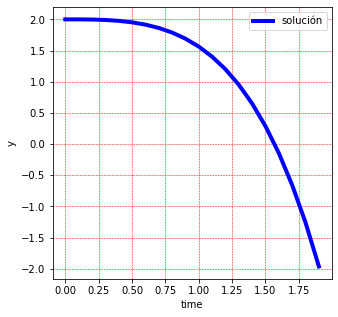

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(tiempo_simulacion,solucion,linewidth=4,color='b')
plt.grid(color='r', linestyle='--', linewidth=.5)
plt.legend(['solución'])
plt.xlabel('time')
plt.ylabel('y')
plt.show()

Note que odeint retorna un array de numpy con los valores aproximados de la solución correspondientes a los tiempos de simulación usandos. Podmeos por ejmeplo imprimir los primeros de estos valores. 

In [ ]:
for i in range(0,20):
  print(' y({:2.6f})  \u007E es aproximadamente {:2.6f} '.format( tiempo_simulacion[i], solucion[i][0]))

 y(0.000000)  ~ es aproximadamente 2.000000 
 y(0.100000)  ~ es aproximadamente 1.999658 
 y(0.200000)  ~ es aproximadamente 1.997195 
 y(0.300000)  ~ es aproximadamente 1.990282 
 y(0.400000)  ~ es aproximadamente 1.976351 
 y(0.500000)  ~ es aproximadamente 1.952557 
 y(0.600000)  ~ es aproximadamente 1.915762 
 y(0.700000)  ~ es aproximadamente 1.862495 
 y(0.800000)  ~ es aproximadamente 1.788918 
 y(0.900000)  ~ es aproximadamente 1.690794 
 y(1.000000)  ~ es aproximadamente 1.563436 
 y(1.100000)  ~ es aproximadamente 1.401668 
 y(1.200000)  ~ es aproximadamente 1.199766 
 y(1.300000)  ~ es aproximadamente 0.951407 
 y(1.400000)  ~ es aproximadamente 0.649600 
 y(1.500000)  ~ es aproximadamente 0.286622 
 y(1.600000)  ~ es aproximadamente -0.146065 
 y(1.700000)  ~ es aproximadamente -0.657895 
 y(1.800000)  ~ es aproximadamente -1.259295 
 y(1.900000)  ~ es aproximadamente -1.961789 


Podemos por ejemplo, resolver para un conjunto de condiciones iniciales como se indica a continuación.

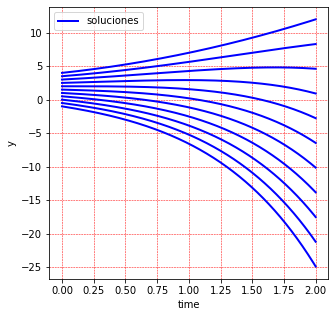

In [ ]:
tiempo_simulacion=np.arange(0,2,0.001)
CI_ej1=np.array([-1,-0.5,0,.5,1,1.5,2,2.5,3,3.5,4])
solucion=odeint(RHS_ejemplo1,CI_ej1, tiempo_simulacion)
plt.figure(figsize=(5,5))
plt.plot(tiempo_simulacion,solucion,linewidth=2,color='b')
plt.grid(color='r', linestyle='--', linewidth=.5)
plt.legend(['soluciones'])
plt.xlabel('time')
plt.ylabel('y')
plt.show()

In [ ]:
def animacion_ejemplo(x0):
    tiempo_simulacion=np.arange(0,2,0.1) # valores de tiempo 
    CI_ej1=[x0] # condición inical
    solucion=odeint(RHS_ejemplo1,CI_ej1, tiempo_simulacion)
    plt.plot(tiempo_simulacion, solucion, 'b-') # plot the solution
    plt.xlim(0,2)
    plt.ylim(-12, 20)
    plt.grid()
    plt.show() 

Podemos estudiar gráficamente el comportamiento con respecto a la condición inicial usando ipywidgets. 

In [ ]:
plot_interactivo= interactive(animacion_ejemplo, x0=(-1, 4, 0.01))

plot_interactivo

interactive(children=(FloatSlider(value=1.0, description='x0', max=4.0, min=-1.0, step=0.01), Output()), _dom_…

#Un problema de calefacción
Tenemos el siguiente modelo de calefacción, 
$$
\frac{du}{dt}=-K (u - T(t)),
$$
donde $u$ es la temperatura interna, y $T(t)$ es la temperatura externa.
Considere  $K= 1.5/$d\'ia y sea $T(t)= 60+15 \sin (2\pi t)^o$F, entonces
$$
\frac{du}{dt}=- 1.5 u +90 +22.5 \sin (2\pi t), \quad \quad u(0)=70^o F.
$$

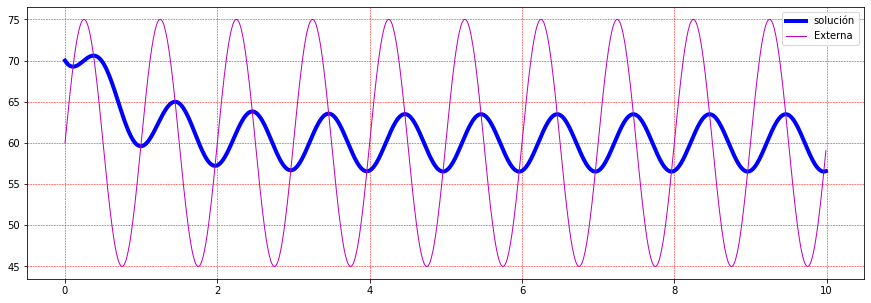

In [ ]:
def RHS_calefaccion(u, t,par):
  k=par
  du= -k*u+90+22.5*np.sin(2*np.pi*t)
  return du
ts=np.arange(0,10,0.01)
Tts= 60+15*np.sin(2*np.pi* ts)
sol_calefaccion=odeint(RHS_calefaccion,70, ts,args=(1.5,))
plt.figure(figsize=(15,5))
plt.plot(ts,sol_calefaccion,linewidth=4,color='b')
plt.plot(ts,Tts,linewidth=1,color='m')
plt.grid(color='r', linestyle='--', linewidth=.5)
plt.legend(['solución','Externa'])
plt.show()

# El modelo de Bertalanffy de crecimiento de tumores
Considere el modelo de ecuaciones diferenciales, 
$$
V'= aV^\frac{2}{3}-bV,
$$
con $V_0=V(0)$ dado. La variable $V$ representa o aproxima el volumen del tumor en el tiempo $t$.

In [ ]:
# Modelo de Bertalanffy
def modeloBF(V, t, par):
  a,b=par
  dV=a*np.power(V, 2/3)-b*V;
  return dV

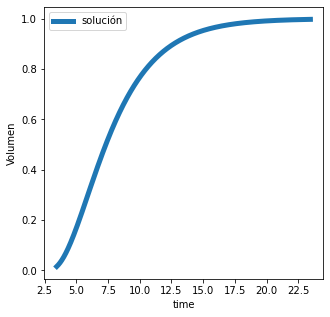

In [ ]:
tiempo_simulacion=3.46+np.linspace(0, 20, 1000) 
V0=0.0158
VolumenBF=odeint(modeloBF, V0, tiempo_simulacion, args=([1,1],))
plt.figure(figsize=(5,5))
plt.plot(tiempo_simulacion,VolumenBF,linewidth=5)
plt.legend(['solución'])
plt.xlabel('time')
plt.ylabel('Volumen')
plt.show()

# Un sistema $2\times 2$

Considere el siguiente sistema de dos ecuaciones con dos incognitas funcionales, 
$$
\left \{ \begin{array}{rcl]}
x'_1 &=& 3x_1 + 4x_2 - \sin(t),\\
x'_2 &=& -x_1 + 2x_2 - t^2,\\
x_1(0) &=& 1,\\
x_2(0) &=& -1.
\end{array}\right.
$$

In [ ]:
def RHS_sistema(x, t):
  dx=x*0
  dx[0]= 3*x[0]+4*x[1]-np.sin(t)
  dx[1]=-x[0]+2*x[1]-t**2
  return dx
ts=np.arange(0,1,0.01)
CI_sistema=[1,-1]
sol_sistema=odeint(RHS_sistema,CI_sistema, ts)

Note que en este caso tenemos dos componentes, es decir, dos funciones dependientes del tiempo. Tenemos várias opticiones para desplegar gráficamente la solución. 
Podemos gráfiar las dos componentes contra el tiempo en una misma ventana gráfica como sigue. 

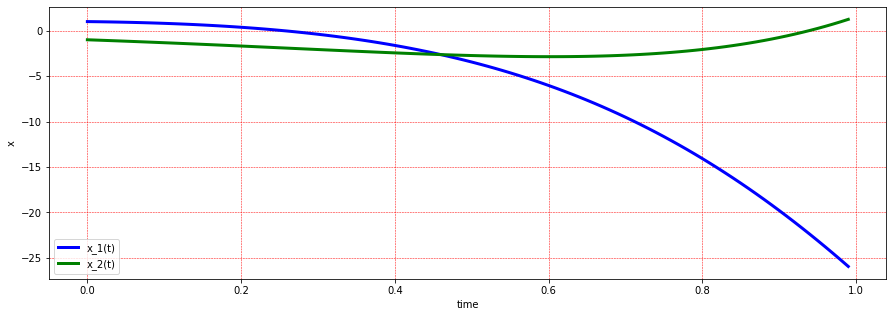

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(ts,sol_sistema[:,0],linewidth=3,color='b')
plt.plot(ts,sol_sistema[:,1],linewidth=3,color='g')
plt.grid(color='r', linestyle='--', linewidth=.5)
plt.legend(['x_1(t)','x_2(t)'])
plt.xlabel('time')
plt.ylabel('x')
plt.show()

Podemos, como antes, desplegar la tabla de valores calculados para $x_1$ y $x_2$. 

In [ ]:
for i in range(0,20):
  print('t={:2.6f}--> \t x_1(t) = {:2.6f}\t x_2(t)={:2.6f}'.format( ts[i], sol_sistema[i][0],sol_sistema[i][1]))

t=0.000000--> 	 x_1(t) = 1.000000	 x_2(t)=-1.000000
t=0.010000--> 	 x_1(t) = 0.989189	 x_2(t)=-1.030249
t=0.020000--> 	 x_1(t) = 0.976708	 x_2(t)=-1.060994
t=0.030000--> 	 x_1(t) = 0.962488	 x_2(t)=-1.092229
t=0.040000--> 	 x_1(t) = 0.946455	 x_2(t)=-1.123949
t=0.050000--> 	 x_1(t) = 0.928534	 x_2(t)=-1.156146
t=0.060000--> 	 x_1(t) = 0.908649	 x_2(t)=-1.188813
t=0.070000--> 	 x_1(t) = 0.886722	 x_2(t)=-1.221940
t=0.080000--> 	 x_1(t) = 0.862671	 x_2(t)=-1.255519
t=0.090000--> 	 x_1(t) = 0.836415	 x_2(t)=-1.289539
t=0.100000--> 	 x_1(t) = 0.807867	 x_2(t)=-1.323987
t=0.110000--> 	 x_1(t) = 0.776942	 x_2(t)=-1.358851
t=0.120000--> 	 x_1(t) = 0.743550	 x_2(t)=-1.394117
t=0.130000--> 	 x_1(t) = 0.707600	 x_2(t)=-1.429770
t=0.140000--> 	 x_1(t) = 0.669000	 x_2(t)=-1.465792
t=0.150000--> 	 x_1(t) = 0.627654	 x_2(t)=-1.502167
t=0.160000--> 	 x_1(t) = 0.583465	 x_2(t)=-1.538875
t=0.170000--> 	 x_1(t) = 0.536332	 x_2(t)=-1.575896
t=0.180000--> 	 x_1(t) = 0.486155	 x_2(t)=-1.613208
t=0.190000--

Alternativamente podemos trazar la **órbita** de la solución en el **plano de fase** como sigue. 

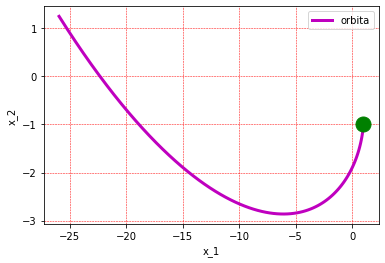

In [ ]:
plt.plot(sol_sistema[:,0],sol_sistema[:,1],linewidth=3,color='m')
plt.grid(color='r', linestyle='--', linewidth=.5)
plt.plot(CI_sistema[0],CI_sistema[1],color='g',marker='.',markersize=30)
plt.legend(['orbita'])
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

# Interacción de dos especies: modelo depredador presa.

---



Consider el siguiente modelo de interacción entre dos especies. En particular se modela la relación predador/presa. Otras relaciones tambien puede ser modeladas: dependencia, cooperación, e.t.c. En este ejemplo podemos pensar en población de zorros y conejos. Tenemos el suguiente sistema, 


Especie $1$. Zorros:
$$
x'_1 = -d x_1 +e x_1 x_2.
$$
Especie $2$. Conejos:
$$
x'_2 =r (1 - \frac{x_2}{k}) x_2 - c  x_1 x_2.
$$

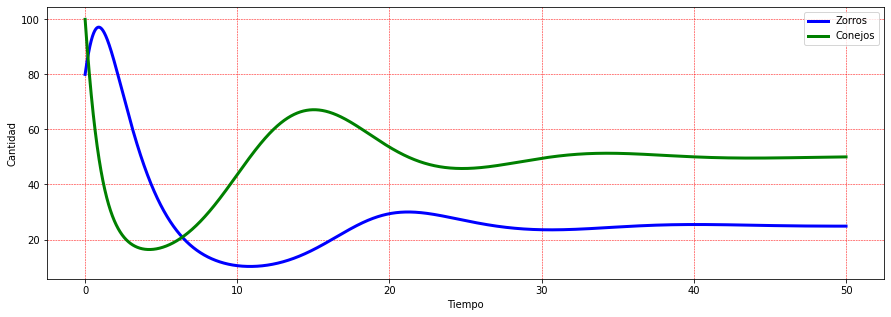

In [ ]:
def RHS_predadorpresa(x, t,par):
  d,e,r,k,c=par
  dx=x*0
  dx[0]= -d*x[0]+e*x[0]*x[1]
  dx[1]= r* (1 -(x[1]/k) )*x[1]-c*x[0]*x[1]
  return dx
ts=np.arange(0,50,0.001)
par=[0.5,0.01,0.5,100,0.01]
CI_predadorpresa=[80,100]
sol_sistema=odeint(RHS_predadorpresa,CI_predadorpresa, ts, args=(par,))
plt.figure(figsize=(15,5))
plt.plot(ts,sol_sistema[:,0],linewidth=3,color='b')
plt.plot(ts,sol_sistema[:,1],linewidth=3,color='g')
plt.grid(color='r', linestyle='--', linewidth=.5)
plt.legend(['Zorros','Conejos'])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.show()

Ahora desplegamos gráficamente las componentes, es decir, la población de cada especies a medida que avanza el tiempo. Como antes, podemos tambien dibujar la órbita de la solución, 

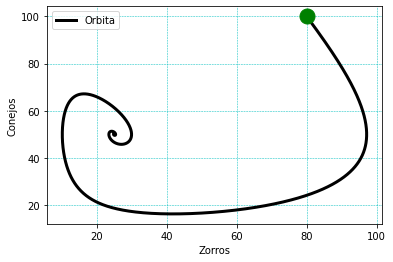

In [ ]:
plt.plot(sol_sistema[:,0],sol_sistema[:,1],linewidth=3,color='k')
plt.plot(CI_predadorpresa[0],CI_predadorpresa[1],color='g',marker='.',markersize=30)
plt.grid(color='c', linestyle='--', linewidth=.5)
plt.legend(['Orbita'])
plt.xlabel('Zorros')
plt.ylabel('Conejos')
plt.show()

In [ ]:
def animacion_pp(e,c):
  ts=np.arange(0,50,0.001)
  par=[0.5,e,0.5,100,c]
  CI_predadorpresa=[80,100]
  sol_sistema=odeint(RHS_predadorpresa,CI_predadorpresa, ts, args=(par,))
  plt.figure(figsize=(15,5))
  plt.plot(ts,sol_sistema[:,0],linewidth=3,color='b')
  plt.plot(ts,sol_sistema[:,1],linewidth=3,color='g')
  plt.grid(color='r', linestyle='--', linewidth=.5)
  plt.legend(['Zorros','Conejos'])
  plt.xlabel('Tiempo')
  plt.ylabel('Cantidad')
  plt.xlim(0,50)
  plt.ylim(0, 200)
  plt.show()

In [ ]:
plot_interactivo= interactive(animacion_pp, e=(0, .05, 0.01), c=(0,0.05,0.01))

plot_interactivo

interactive(children=(FloatSlider(value=0.02, description='e', max=0.05, step=0.01), FloatSlider(value=0.02, d…

In [ ]:
def animacion_pp2(x1,x2):
  ts=np.arange(0,50,0.001)
  par=[0.5,0.01,0.5,100,0.01]
  CI_predadorpresa=[x1,x2]
  sol_sistema=odeint(RHS_predadorpresa,CI_predadorpresa, ts, args=(par,))
  plt.plot(sol_sistema[:,0],sol_sistema[:,1],linewidth=3,color='k')
  plt.plot(CI_predadorpresa[0],CI_predadorpresa[1],color='g',marker='.',markersize=30)
  plt.grid(color='c', linestyle='--', linewidth=.5)
  plt.legend(['Órbita'])
  plt.xlabel('Zorros')
  plt.ylabel('Conejos')
  plt.xlim(0,200)
  plt.ylim(0, 200)
  plt.show()


plot_interactivo= interactive(animacion_pp2, x1=(50, 150, 1), x2=(50,150,1))

plot_interactivo

interactive(children=(IntSlider(value=100, description='x1', max=150, min=50), IntSlider(value=100, descriptio…

# Peces y botes
Podemos resolver sistemas de la siguiente forma. Considere por ejemplo el sistema de peces vs botes dado por 
$$
\frac{df}{dt}= f(2-b-f) \\
\frac{db}{dt}=-b(1-1.5f).
$$
Con condición inicial  $[1,1]$.

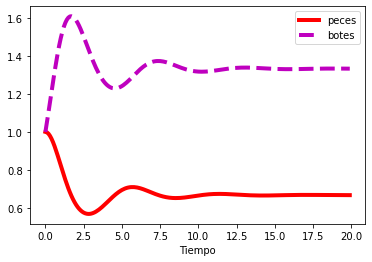

In [ ]:
def RHS_BoatFishSystem(x, t):
    f, b = x
    d_f = f * (2 - b - f)
    d_b = -b* (1 - 1.5 * f)
    return [d_f, d_b]



t = np.arange(0, 20, 0.1)
CI_FB = [1, 1]
sol_FB = odeint(RHS_BoatFishSystem, CI_FB, t)


plt.plot(t, sol_FB[:, 0], 'r-',linewidth=4,label='peces')
plt.plot(t, sol_FB[:, 1], 'm--',linewidth=4,label='botes')
plt.xlabel('Tiempo')
plt.legend()
plt.show()

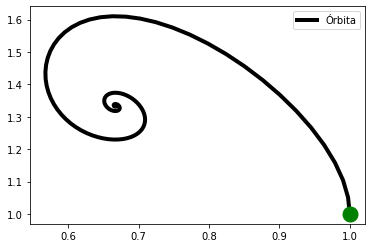

In [ ]:
plt.plot(sol_FB[:,0], sol_FB[:, 1], 'k-',linewidth=4,label='Órbita')
plt.plot(CI_FB[0],CI_FB[1],color='g',marker='.',markersize=30)

plt.legend()
plt.show()

# Interacción de tres especies.

Especie $1$. Zorros:
$$
x'_1 = -d x_1 +e x_1 x_2 + f  x_1 x_3.
$$
Especie $2$. Conejos:
$$
x'_2 =r_c (1 - \frac{x_2}{k_c}) x_2 - c  x_1 x_2.
$$
Especie $3$. Pavos:
$$
x'_3 =r_p (1 - \frac{x_3}{k_p}) x_3 - d  x_1 x_3.
$$


d= 0.5 , e= 0.01 , f= 0.03 , r_c= 1 , k_c= 100 , c_c 0.01 , r_p= 3.2 , k_p= 80 , cp= 0.003 .


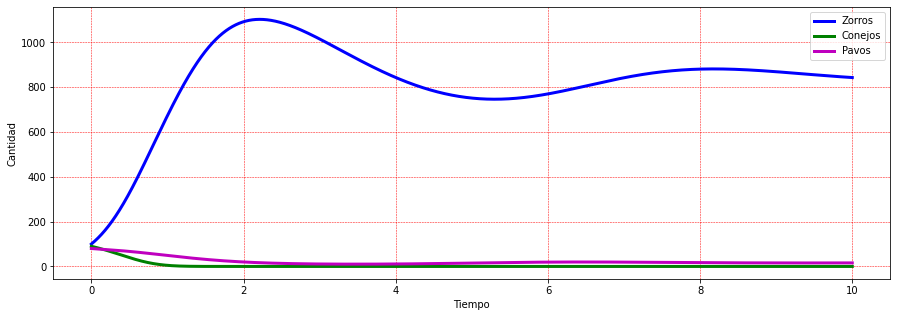

In [ ]:
def RHS_predadorpresa(x, t,par):
  d,e,f,rc,kc,cc,rp,kp,cp=par
  dx=x*0
  dx[0]= -d*x[0]+e*x[0]*x[1]+f*x[0]*x[2]
  dx[1]= rc* (1 -(x[1]/kc) )*x[1]-cc*x[0]*x[1]
  dx[2]= rp* (1 -(x[2]/kp) )*x[2]-cp*x[0]*x[2]
  return dx
ts=np.arange(0,10,0.001)
par=[0.5,0.01,0.03,1,100,0.01,3.2,80,0.003]
d,e,f,rc,kc,cc,rp,kp,cp=par
print('d=',d,', e=',e,', f=',f,', r_c=',rc,', k_c=',kc,', c_c',cc,', r_p=',rp,', k_p=',kp,', cp=',cp,'.' )
CI_zcp=[100,90,80]
sol_sistema=odeint(RHS_predadorpresa,CI_zcp, ts, args=(par,))
plt.figure(figsize=(15,5))
plt.plot(ts,sol_sistema[:,0],linewidth=3,color='b')
plt.plot(ts,sol_sistema[:,1],linewidth=3,color='g')
plt.plot(ts,sol_sistema[:,2],linewidth=3,color='m')
plt.grid(color='r', linestyle='--', linewidth=.5)
plt.legend(['Zorros','Conejos','Pavos'])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.show()

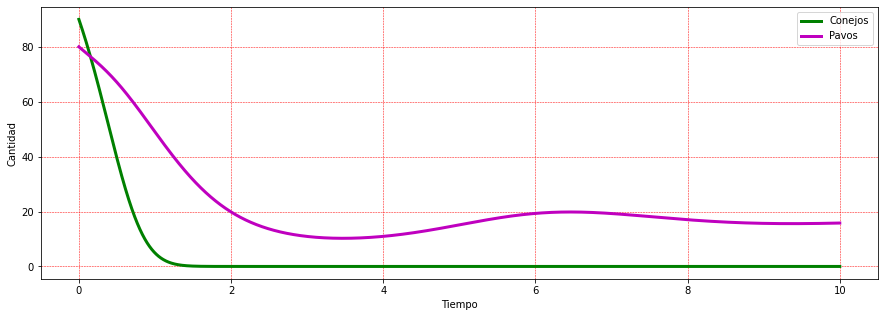

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(ts,sol_sistema[:,1],linewidth=3,color='g')
plt.plot(ts,sol_sistema[:,2],linewidth=3,color='m')
plt.grid(color='r', linestyle='--', linewidth=.5)
plt.legend(['Conejos','Pavos'])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.show()

<Figure size 432x288 with 0 Axes>

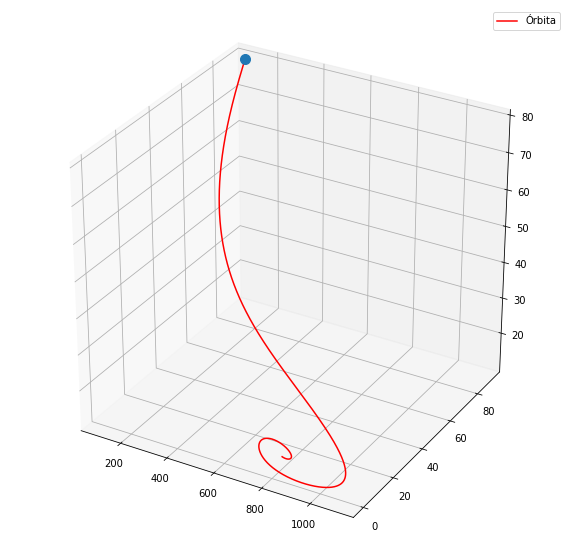

In [ ]:
from mpl_toolkits import mplot3d
fig=plt.figure()
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot3D(sol_sistema[:,0],sol_sistema[:,1],sol_sistema[:,2], 'red')
ax.plot3D([CI_zcp[0]],[CI_zcp[1]],[CI_zcp[2]],marker='.',markersize=20)
plt.legend(['Órbita'])

plt.show()

# Pendulo

Consideremos
$c$: resistencia, $m$: masa, $g$: gravedad, $L$: longitud,
$\theta$: angulo, $V$: velocidad angular. \\
Entonces
\begin{eqnarray}
\theta' &=& V\\
V' &=& -w^2 \sin(\theta) - \gamma V\\
\gamma &=& \frac{c}{mL}, \quad \quad  w^2= \frac{g}{L}.
\end{eqnarray}

Este sistema corresponde a la ecuación esclar de segundo orden, 
$$
\left\{    \begin{array}{lc}
    \displaystyle y''=-\omega^2\sin(y)-\gamma y'     &  \\
    y(t_0)=y_0,     & \\
    y'(t_0)=y_1.     & \\
    \end{array}\right.
$$

c= 2 , m= 1 , g= 10 , L= 2 .


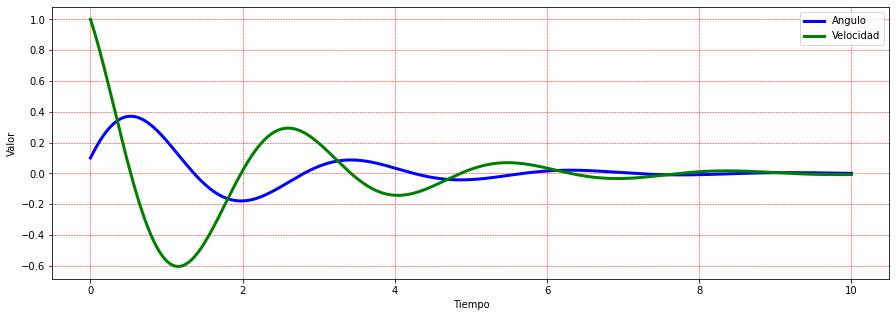

In [ ]:
def RHS_pendulo(x, t,par):
  c,m,g,L=par
  gamma=c/(m*L)
  omega2=g/L
  dx=x*0
  dx[0]=x[1]
  dx[1]= - omega2*np.sin( x[0])-gamma*x[1] 
  return dx
ts=np.arange(0,10,0.001)
par=[2,1,10,2]
c,m,g,L=par
print('c=',c,', m=',m,', g=',g,', L=',L,'.')
CI_p=[0.1,1]
sol_pendulo=odeint(RHS_pendulo,CI_p, ts, args=(par,))
plt.figure(figsize=(15,5))
plt.plot(ts,sol_pendulo[:,0],linewidth=3,color='b')
plt.plot(ts,sol_pendulo[:,1],linewidth=3,color='g')
plt.grid(color='r', linestyle='--', linewidth=.5)
plt.legend(['Angulo','Velocidad'])
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.show()

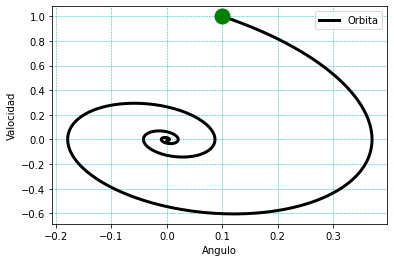

In [ ]:
plt.plot(sol_pendulo[:,0],sol_pendulo[:,1],linewidth=3,color='k')
plt.plot(CI_p[0],CI_p[1],color='g',marker='.',markersize=30)
plt.grid(color='c', linestyle='--', linewidth=.5)
plt.legend(['Orbita'])
plt.xlabel('Angulo')
plt.ylabel('Valocidad')
plt.show()

In [ ]:
def animacion_pen(ang,vel):
  ts=np.arange(0,10,0.001)
  par=[2,1,10,2]
  CI_p=[ang,vel]
  sol_pendulo=odeint(RHS_pendulo,CI_p, ts, args=(par,))
  plt.plot(sol_pendulo[:,0],sol_pendulo[:,1],linewidth=3,color='k')
  plt.plot(CI_p[0],CI_p[1],color='g',marker='.',markersize=30)
  plt.grid(color='c', linestyle='--', linewidth=.5)
  plt.legend(['Orbita'])
  plt.xlabel('Angulo')
  plt.ylabel('Valocidad')
  plt.xlim(-4*np.pi,4*np.pi)
  plt.ylim(-4, 10)
  plt.show()
  

plot_interactivo= interactive(animacion_pen, ang=(0, 1.4, .01), vel=(0,10,.01))

plot_interactivo

interactive(children=(FloatSlider(value=0.7000000000000001, description='ang', max=1.4, step=0.01), FloatSlide…

# Pendulo doble 
$$
\left\{    \begin{array}{lc}
\displaystyle     y''_1= \frac{A}{l_1(2m_1+m_2-m_2\cos(2y_1-2y_2)} -c_1y_1'   &  \\
\displaystyle     y''_2= \frac{B}{l_2(2m_1+m_2-m_2\cos(2y_1-2y_2)} -c_2y_2'  \\
    y_1(t_0)=y_{10},  \quad   y'_1(t_0)=y_{11}.     & \\
    y_2(t_0)=y_{20},  \quad   y'_2(t_0)=y_{21}.     & \\
    \end{array}\right.
$$
donde
\begin{align*}
    A&=-g(2m_1+m_2)\sin(y_1)-m_2g\sin(y_1-2y_2)\\&-2\sin(y_1-y_2)m_2\Big(
     (y_2')^2l_2+(y_1')^2l_1\cos(y_1-y_2)\Big),
\end{align*}
y 
\begin{align*}
    B&=2\sin(y_1-y_2)
    \Big( (y_1')^2l_1(m_1+m_2)+
    g(m_1+m_2)\cos(y_1)\\&+
    (y_2')^2l_2\cos(y_1-y_2) \Big).
\end{align*}
Podemos implementar este modelo como sigue. 


In [ ]:
def RHS_pendulo_doble(x, t,par):
  M1,M2,L1,L2,G,c1,c2=par
  dx=x*0
  dx[0] = x[1]

  den1 = (M1+M2)*L1 - M2*L1*np.cos( x[2]-x[0])*np.cos(x[2]-x[0])
  T1= M2*L1*x[1]*x[1]*np.sin(x[2]-x[0])*np.cos(x[2]-x[0])
  T2=M2*G*np.sin(x[2])*np.cos(x[2]-x[0])
  T3=M2*L2*x[3]*x[3]*np.sin(x[2]-x[0])
  T4=(M1+M2)*G*np.sin(x[0]);

  dx[1] = (T1+T2+T3-T4)/den1-c1*x[1]
  dx[2]=x[3];

  den2=(L2/L1)*den1;

  T1= M2*L2*x[3]*x[3]*np.sin(x[2]-x[0])*np.cos(x[2]-x[0])
  T2=(M1+M2)*G*np.sin(x[0])*np.cos(x[2]-x[0]);
  T3=(M1+M2)*L1*x[1]*x[1]*np.sin(x[2]-x[0]);
  T4=(M1+M2)*G*np.sin(x[2]);

  dx[3]= (-T1+ T2-T3 - T4)/den2-c2*x[3];

  return dx

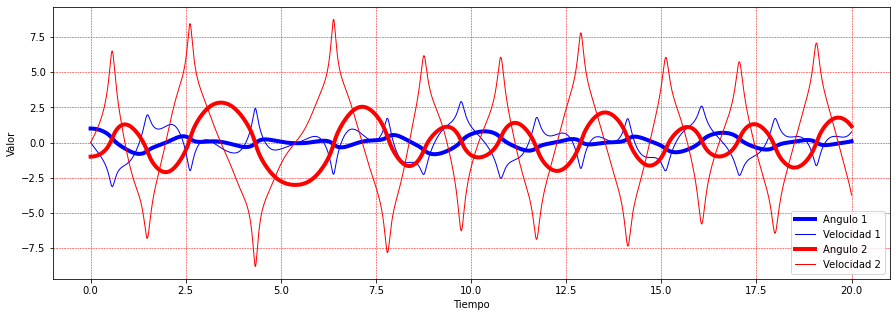

In [ ]:
ts=np.arange(0,20,0.001)
par=[1,1,2,1,9.8,0.1,0]
M1,M2,L1,L2,G,c1,c2=par

CI_pd=[1,0,-1,0]
sol_doble=odeint(RHS_pendulo_doble,CI_pd, ts, args=(par,))
plt.figure(figsize=(15,5))
plt.plot(ts,sol_doble[:,0],linewidth=4,color='b')
plt.plot(ts,sol_doble[:,1],linewidth=1,color='b')
plt.plot(ts,sol_doble[:,2],linewidth=4,color='r')
plt.plot(ts,sol_doble[:,3],linewidth=1,color='r')
plt.grid(color='r', linestyle='--', linewidth=.5)
plt.legend(['Angulo 1','Velocidad 1','Angulo 2','Velocidad 2'])
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.show()

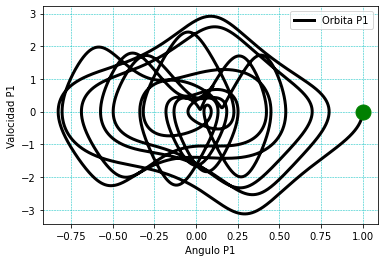

In [ ]:
plt.plot(sol_doble[:,0],sol_doble[:,1],linewidth=3,color='k')
plt.plot(CI_pd[0],CI_pd[1],color='g',marker='.',markersize=30)
plt.grid(color='c', linestyle='--', linewidth=.5)
plt.legend(['Orbita P1'])
plt.xlabel('Angulo P1')
plt.ylabel('Valocidad P1')
plt.show()

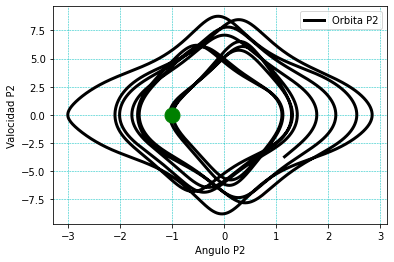

In [ ]:
plt.plot(sol_doble[:,2],sol_doble[:,3],linewidth=3,color='k')
plt.plot(CI_pd[2],CI_pd[3],color='g',marker='.',markersize=30)
plt.grid(color='c', linestyle='--', linewidth=.5)
plt.legend(['Orbita P2'])
plt.xlabel('Angulo P2')
plt.ylabel('Valocidad P2')
plt.show()

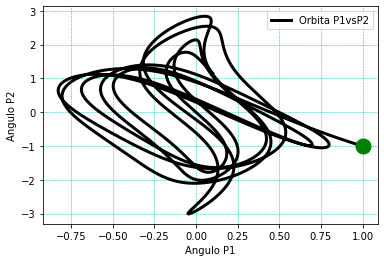

In [ ]:
plt.plot(sol_doble[:,0],sol_doble[:,2],linewidth=3,color='k')
plt.plot(CI_pd[0],CI_pd[2],color='g',marker='.',markersize=30)
plt.grid(color='c', linestyle='--', linewidth=.5)
plt.legend(['Orbita P1vsP2'])
plt.xlabel('Angulo P1')
plt.ylabel('Angulo P2')
plt.show()

# Sistema de Lorenz

$$
\left\{    \begin{array}{lc}
    x_1'= \sigma(x_2-x_1)     &  \\
    x_2'= rx_1-x_2-x_1x_3 &  \\
    x_3'= x_1x_2-bx_3.
\end{array}\right.
$$

In [ ]:
def lorenz(x, t,par):
  sigma,b,r=par
  dx=x*0
  dx[0]= sigma*(x[1]-x[0]);
  dx[1]= r*x[0]- x[1]-x[0]*x[2];
  dx[2]=x[0]*x[1]-b*x[2];
  return dx

In [ ]:
ts=np.arange(0,40,0.001)
par=[10,8/3,28];
sigma,b,r=par
print('sigma=',sigma,', b=',b,', r=',r)
CI_l=[0,1,0]
sol_lorenz=odeint(lorenz,CI_l, ts, args=(par,))

sigma= 10 , b= 2.6666666666666665 , r= 28


<Figure size 432x288 with 0 Axes>

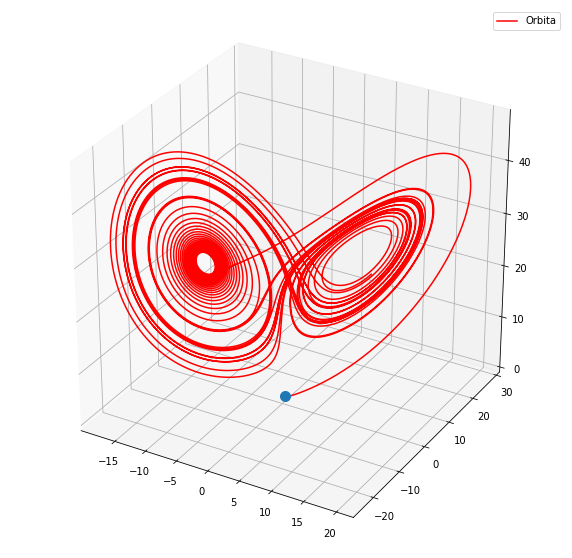

In [ ]:
from mpl_toolkits import mplot3d
fig=plt.figure()
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot3D(sol_lorenz[:,0],sol_lorenz[:,1],sol_lorenz[:,2], 'red')
ax.plot3D([CI_l[0]],[CI_l[1]],[CI_l[2]],marker='.',markersize=20)
#ax.view_init(elev=20., azim=30)
plt.legend(['Orbita'])

plt.show()

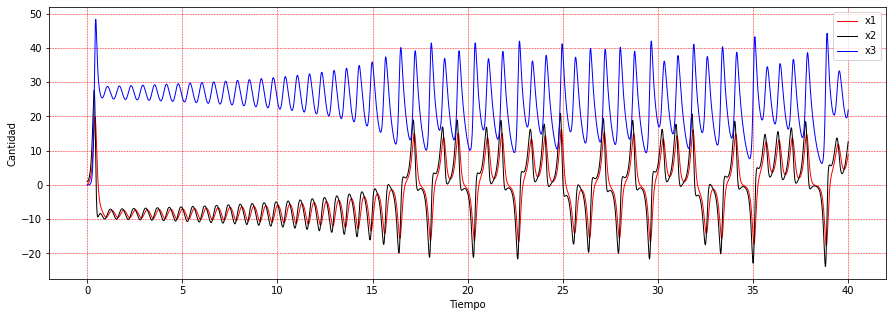

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(ts,sol_lorenz[:,0],linewidth=1,color='r')
plt.plot(ts,sol_lorenz[:,1],linewidth=1,color='k')
plt.plot(ts,sol_lorenz[:,2],linewidth=1,color='b')
plt.grid(color='r', linestyle='--', linewidth=.5)
plt.legend(['x1','x2','x3'])
plt.xlabel('Tiempo')
plt.ylabel('Cantidad')
plt.show()